# Feature Selection 

Feature selection should be perfomed to use only representative features in models. First, we will use filter algorithms simple methods such as Chi square and Correlation matrix methods to have an initial visualization.

Then, different regression embeded methods will be used to determine feature importance and select the best features to feed our models:

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- XgBoost Regression
- Permutation Regression

I propose 2 ways of selecting best features, one is simply selecting the top occurrences total sum of the counts, the second one is selecting the the features that appeared as a top in at least 2 different models


At the end we are going to transform the original set to a set that only includes the most relevant features.

In [1]:
#Setup
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

# Loading CSV

In [2]:
#Importing train and test generated sets in feature engineering step
import pathlib
pathlib.Path.cwd()



path = pathlib.Path.cwd() / 'process sets' / 'xtrain_ready.csv'
x_train = pd.read_csv(path, index_col= None)
path = pathlib.Path.cwd() / 'process sets' / 'ytrain_ready.csv'
y_train = pd.read_csv(path, index_col= None)


path = pathlib.Path.cwd() / 'process sets' / 'xtest_ready.csv'
x_test = pd.read_csv(path, index_col= None)
path = pathlib.Path.cwd() / 'process sets' / 'ytest_ready.csv'
y_test= pd.read_csv(path, index_col= None)








#preventive reset index to avoid index bugs
y_train.reset_index(inplace=True)
y_train.drop("index", axis= 1, inplace=True)
y_train = y_train.squeeze()
#joining x and y
juntos = pd.concat([x_train, y_train], axis=1)


# Simple filter algorithms methods

# Defining Chi square method

In [3]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Convert to np array
def chi(x_train,y_train,val=10):
    array = x_train.values
    x = array[:,:]

    y = y_train.to_numpy()



    # Feature extraction
    test = SelectKBest(score_func=chi2, k=4)
    fit = test.fit(x, y)

    # Summarize scores
    np.set_printoptions(precision=3)
 

    #Joining labels with scores
    join = list(zip(x_train.columns, fit.scores_))


    join= pd.DataFrame(join, columns= ["Feature", "Chi Score"])
    join

    sort= join.sort_values(by= ["Chi Score"], ascending=False)
    
    #Selecting top features in a list
    selected = list(sort["Feature"])
    selected = selected[:val]
    
    #Data preparation for plotting
    top_sort = sort.iloc[:val]
    #Plot of chi score values
    sns.set_style("dark")
    plt.figure(figsize=(10,4))
    sns.set_context("paper" , font_scale=1)
    ax=  sns.barplot(x= "Feature" , y = "Chi Score" ,data= top_sort)
    
    ax.set(title='Chi Score')  # add a title
    ax.set(xlabel="Feature") # remove the axis label

        
    
    plt.xticks(rotation=45)

    
    
    
   
 
    return selected

# Defining Correlation Coeficient Matrix method 

In [4]:
#Checking correlation
def cor(x_train,y_train,val=10):
    juntos = pd.concat([x_train, y_train], axis=1)
    #Creating correlation matrix
    corr_matrix = juntos.corr()
    
    sort = ((corr_matrix["SalePrice"].sort_values(ascending=False)))
    sort = abs(sort)
    
    
    
    
    
    sort = sort.sort_values(ascending=False)
    sort

    sort= sort.iloc[:].index.values

    selected = list(sort)
    
    
    
    #Printing correlation matrix heatmap
    
    # import modules

    sns.set_style("whitegrid")
    #Selecting top variables in a list
    selected = selected[:val]
    #Selecting top variables in original correlation matrix
    cor_matrix_sel = corr_matrix.loc[selected,selected]
    
   
    

    # plotting correlation heatmap for top 10 features
    print("Correlation Matrix Heatmap")
    dataplot = sns.heatmap(cor_matrix_sel, cmap="viridis", annot=True)

    # displaying heatmap
    plt.show()
    return selected

# Embeded methods

# Feature Importance
The process of giving a score to a feature based in simple model



# Defining simple Linear Regression method

In [5]:
# Linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot


def linreg(x_train,y_train,val=10):
    # define dataset
    X, y = x_train, y_train
    # define the model
    model = LinearRegression()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = abs(model.coef_)
    col = x_train.columns

    join = list(zip(col, importance))


    join= pd.DataFrame(join, columns= ["Feature", "Importance Score"])
    join


    sort= join.sort_values(by= ["Importance Score"], ascending=False)


    
    importance= list(sort["Importance Score"])
    selected = list(sort["Feature"])
    #Selecting top variables in a list
    selected = selected[:val]
    
    
    
    
    #Data preparation for plotting
    top_sort = sort.iloc[:val]
    #Plot of chi score values
    sns.set_style("dark")
    plt.figure(figsize=(10,4))
    sns.set_context("paper" , font_scale=1)
    ax=  sns.barplot(x= "Feature" , y = "Importance Score" ,data= top_sort)
    
    ax.set(title='Linear regression top features')  # add a title
    ax.set(xlabel="Feature") # remove the axis label

        
    
    plt.xticks(rotation=45)
    
    
    
    return selected



# Defining Decision Tree Regressor 

In [6]:
# Decision Tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

def dtreg(x_train,y_train,val=10):

    # define dataset
    X, y = x_train, y_train

    # define the model
    model = DecisionTreeRegressor()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = abs(model.feature_importances_)
    # summarize feature importance
    col = x_train.columns

    join = list(zip(col, importance))


    join= pd.DataFrame(join, columns= ["Feature", "Importance Score"])
    join


    sort= join.sort_values(by= ["Importance Score"], ascending=False)
    sort


    sort
    importance= list(sort["Importance Score"])
    selected = list(sort["Feature"])
    selected = selected[:val]
    
    
    
    
    
    #Data preparation for plotting
    top_sort = sort.iloc[:val]
    #Plot of chi score values
    sns.set_style("dark")
    plt.figure(figsize=(10,4))
    sns.set_context("paper" , font_scale=1)
    ax=  sns.barplot(x= "Feature" , y = "Importance Score" ,data= top_sort)
    
    ax.set(title=' Decision Tree Regressor top features')  # add a title
    ax.set(xlabel="Feature") # remove the axis label

        
    
    plt.xticks(rotation=45)
    
    return selected

# Defining Random Forest Regressor

In [7]:
# RFR for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
def rfreg(x_train,y_train,val=10):
    # define dataset
    X, y = x_train, y_train

    # define the model
    model = RandomForestRegressor()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = abs(model.feature_importances_)
    # summarize feature importance
    col = x_train.columns

    join = list(zip(col, importance))


    join= pd.DataFrame(join, columns= ["Feature", "Importance Score"])
    join


    sort= join.sort_values(by= ["Importance Score"], ascending=False)
    sort


    sort
    importance= list(sort["Importance Score"])
    selected = list(sort["Feature"])
    selected = selected[:val]
    
    
    
    
     #Data preparation for plotting
    top_sort = sort.iloc[:val]
    #Plot of chi score values
    sns.set_style("dark")
    plt.figure(figsize=(10,4))
    sns.set_context("paper" , font_scale=1)
    ax=  sns.barplot(x= "Feature" , y = "Importance Score" ,data= top_sort)
    
    ax.set(title='Random Forest Regressor top features')  # add a title
    ax.set(xlabel="Feature") # remove the axis label

        
    
    plt.xticks(rotation=45)
    
    return selected

# Defining XGBOOST regressor

In [8]:
# XGboost regressor for feature importance
import xgboost
print(xgboost.__version__)
from xgboost import XGBRegressor

def xreg(x_train,y_train,val=10):

    # define dataset
    X, y = x_train, y_train

    # define the model
    model = XGBRegressor()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = abs(model.feature_importances_)
    # summarize feature importance
    col = x_train.columns

    join = list(zip(col, importance))


    join= pd.DataFrame(join, columns= ["Feature", "Importance Score"])
    join


    sort= join.sort_values(by= ["Importance Score"], ascending=False)
    sort


    sort
    importance= list(sort["Importance Score"])
    selected = list(sort["Feature"])
    selected = selected[:val]
    
    
    
    
    
     #Data preparation for plotting
    top_sort = sort.iloc[:val]
    #Plot of chi score values
    sns.set_style("dark")
    plt.figure(figsize=(10,4))
    sns.set_context("paper" , font_scale=1)
    ax=  sns.barplot(x= "Feature" , y = "Importance Score" ,data= top_sort)
    
    ax.set(title='XGBOOST regressor top features')  # add a title
    ax.set(xlabel="Feature") # remove the axis label

        
    
    plt.xticks(rotation=45)
    
    return selected



1.5.0


# Permutation for regression

In [9]:

# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot


def perreg(x_train,y_train,val=10):
    # define dataset
    X, y = x_train, y_train

    # define the model
    model = KNeighborsRegressor()
    # fit the model
    model.fit(X, y)
    results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
    # get importance
    importance = abs(results.importances_mean)
    # summarize feature importance
    col = x_train.columns

    join = list(zip(col, importance))


    join= pd.DataFrame(join, columns= ["Feature", "Importance Score"])
    join


    sort= join.sort_values(by= ["Importance Score"], ascending=False)
    sort


    sort
    importance= list(sort["Importance Score"])
    selected = list(sort["Feature"])
    selected = selected[:val]
    
    
    
     #Data preparation for plotting
    top_sort = sort.iloc[:val]
    #Plot of chi score values
    sns.set_style("dark")
    plt.figure(figsize=(10,4))
    sns.set_context("paper" , font_scale=1)
    ax=  sns.barplot(x= "Feature" , y = "Importance Score" ,data= top_sort)
    
    ax.set(title='Permutation top features')  # add a title
    ax.set(xlabel="Feature") # remove the axis label

        
    
    plt.xticks(rotation=45)
    
    return selected

# Filter Algorithms visualization

Correlation Matrix Heatmap


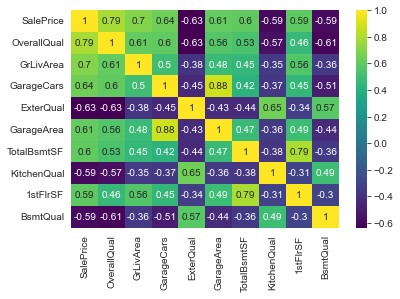

Correlation Matrix method
['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'GarageArea', 'TotalBsmtSF', 'KitchenQual', '1stFlrSF', 'BsmtQual']
Chi Squared method
['Street', 'Heating', 'RoofMatl', 'MiscFeature', 'PoolQC', 'Condition2', 'PoolArea', 'BldgType', 'LandSlope', 'LowQualFinSF']


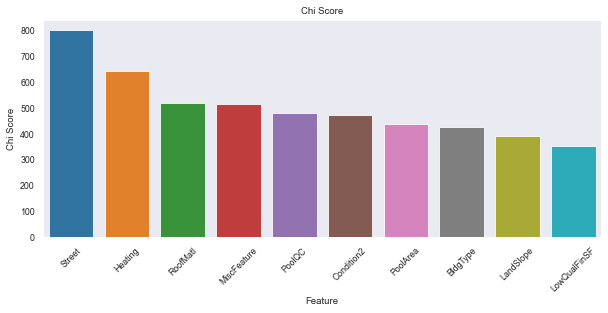

In [10]:
#Number of top features wanted 
val= 10


#Filter Algorithms called

cor_list =cor(x_train,y_train,val)
print("Correlation Matrix method")
print(cor_list)
chi_list =chi(x_train,y_train,val)
print("Chi Squared method")
print(chi_list)








# Embeded methods visualization

Counter({'TotalBsmtSF': 3,
         'BsmtFinSF1': 3,
         'BsmtUnfSF': 1,
         'BsmtFinSF2': 1,
         'PoolArea': 1,
         'PoolQC': 1,
         '1stFlrSF': 3,
         'GrLivArea': 4,
         '2ndFlrSF': 4,
         'OverallQual': 4,
         'TotRmsAbvGrd': 3,
         'YearBuilt': 2,
         'GarageCars': 3,
         'GarageType': 1,
         'LotArea': 1,
         'KitchenAbvGr': 1,
         'ExterQual': 2,
         'KitchenQual': 2,
         'BsmtQual': 2,
         'LandContour': 1,
         'GarageCond': 1,
         'BsmtExposure': 1,
         'GarageFinish': 1,
         'Fireplaces': 1,
         'OpenPorchSF': 1,
         'Neighborhood': 1,
         'MasVnrType': 1})

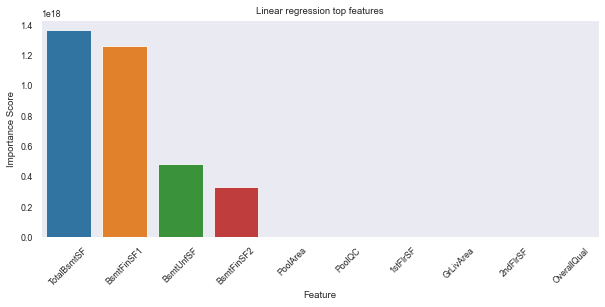

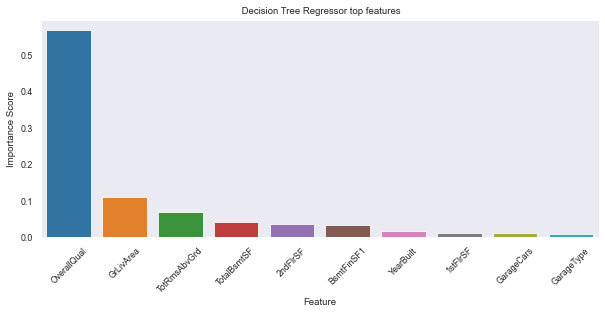

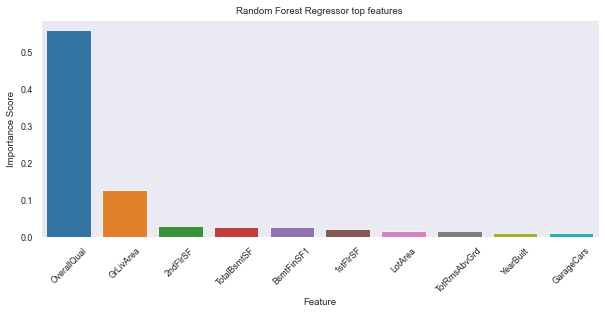

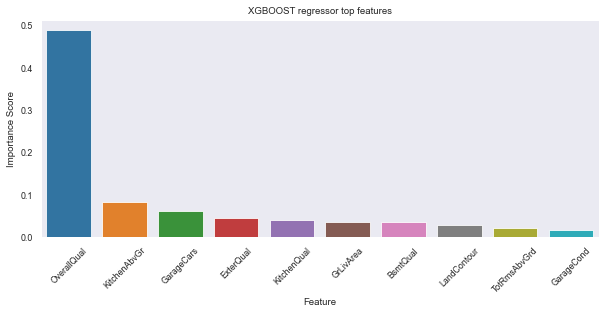

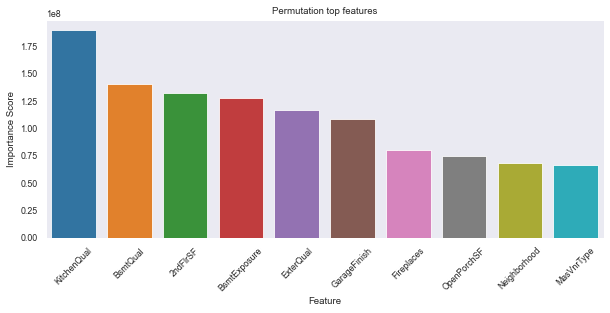

In [11]:
import collections
#top variables finales a seleccionar



#Regression with each method

linreg_list =linreg(x_train,y_train,val)

dtreg_list = dtreg(x_train,y_train,val)

rfreg_list = rfreg(x_train,y_train,val)

xreg_list= xreg(x_train,y_train,val)

perreg_list = perreg(x_train,y_train,val)


#Adding all lists generated with this methods
featsum = linreg_list + dtreg_list + rfreg_list + xreg_list  + perreg_list


#Counting total ocurrence of top features for each method
count = collections.Counter(featsum)
count

In [12]:
#Counter to dataframe 
df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df
df = df.rename(columns={'index':'event', 0:'count'})
sort= df.sort_values(by= ["count"], ascending=False)
sort
print(sort)


#First way of selecting: top  ocurrence
sel = 10
selected = list(sort["event"])
selected = selected[:sel]
selected
print("metodo 1",selected, "number variables selected =" , len(selected) )

#Second way of selecting: top in at least 2 diferent methods
sort = sort.loc[sort["count"] >1 ]
selected2 = list(sort["event"])
selected2 = selected2[:]
selected2 
print("metodo 2",selected2, "number variables selected =" , len(selected2) )






           event  count
9    OverallQual      4
7      GrLivArea      4
8       2ndFlrSF      4
1     BsmtFinSF1      3
12    GarageCars      3
10  TotRmsAbvGrd      3
0    TotalBsmtSF      3
6       1stFlrSF      3
11     YearBuilt      2
16     ExterQual      2
17   KitchenQual      2
18      BsmtQual      2
22  GarageFinish      1
19   LandContour      1
23    Fireplaces      1
24   OpenPorchSF      1
25  Neighborhood      1
21  BsmtExposure      1
20    GarageCond      1
13    GarageType      1
15  KitchenAbvGr      1
14       LotArea      1
5         PoolQC      1
4       PoolArea      1
3     BsmtFinSF2      1
2      BsmtUnfSF      1
26    MasVnrType      1
metodo 1 ['OverallQual', 'GrLivArea', '2ndFlrSF', 'BsmtFinSF1', 'GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'ExterQual'] number variables selected = 10
metodo 2 ['OverallQual', 'GrLivArea', '2ndFlrSF', 'BsmtFinSF1', 'GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'ExterQual', 'Ki

# Tranforming sets to include just top features

We selected the second way to find best features (ocurrence as a top in at least 2 methods)

In [13]:
#X of Train Set
xtrain_ready= x_train[selected2]
ytrain_ready= y_train

#X of Test set
xtest_ready= x_test[selected2]
ytest_ready= y_test




In [14]:
#Exporting to csv

# TRAIN PART to csv
path = pathlib.Path.cwd() / 'process sets' / 'xtrain_sel.csv'
xtrain_ready.to_csv(path, index_label= False)
path = pathlib.Path.cwd() / 'process sets' / 'ytrain_sel.csv'
ytrain_ready.to_csv(path, index_label= False)



# TEST PART to csv
path = pathlib.Path.cwd() / 'process sets' / 'xtest_sel.csv'
xtest_ready.to_csv(path, index_label= False)
path = pathlib.Path.cwd() / 'process sets' / 'ytest_sel.csv'
ytest_ready.to_csv(path, index_label= False)


xtest_ready

,OverallQual,GrLivArea,2ndFlrSF,BsmtFinSF1,GarageCars,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF,YearBuilt,ExterQual,KitchenQual,BsmtQual
0,0.555556,0.593095,0.426634,0.114812,0.50,0.416667,0.134861,0.377220,0.074074,1.000000,0.666667,0.5
1,0.777778,0.604401,0.000000,0.172927,0.50,0.416667,0.301800,0.646573,0.029630,0.333333,0.666667,0.5
2,0.444444,0.484528,0.000000,0.163359,0.25,0.250000,0.215057,0.518336,0.392593,1.000000,1.000000,1.0
3,0.444444,0.417112,0.000000,0.056697,0.50,0.333333,0.177741,0.446217,0.414815,1.000000,1.000000,1.0
4,0.666667,0.589312,0.340436,0.087704,0.50,0.250000,0.174141,0.438472,0.140741,0.333333,0.666667,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.555556,0.422607,0.000000,0.070340,0.50,0.250000,0.180524,0.452095,0.600000,1.000000,0.666667,1.0
288,1.000000,0.647683,0.000000,0.289865,0.75,0.416667,0.340098,0.692875,0.007407,0.000000,0.000000,0.0
289,0.444444,0.554192,0.000000,0.226258,0.25,0.333333,0.242881,0.592860,0.362963,1.000000,1.000000,1.0
290,0.444444,0.609164,0.271671,0.192771,0.50,0.416667,0.178069,0.480189,0.881481,1.000000,1.000000,1.0


# Selected features to .txt file (optional)

In [15]:
path = pathlib.Path.cwd() / 'process sets' / 'features.txt'
with open(path, "w") as output:
    output.write(str(selected2))

In [16]:
print("ready")

ready
